<a href="https://colab.research.google.com/github/VictorMarques94/modelospreditivos/blob/master/Exerc%C3%ADcio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Análise e Engenharia de Dados - Cesar School**

##**Disciplina: Mineração de Dados - Modelos Preditivos**

###**Professor: Ricardo Prudêncio**
###**Aluno: Victor Marques**

# **Contextualização**

A base de dados utilizada neste exercício foi retirada do portal "kaggle" e se refere ao não comparecimento em consultas marcadas.

In [ ]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split

# **Análise exploratória dados**

In [ ]:
# Base "KaggleV2-May-2016.csv".

df = pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
# Levantamento de registros e atributos

print(df.shape[0])
print(df.shape[1])

110527
14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# Transformando as colunas "Gender" e "No-show"em numérico para realizarmos a análise

# No-show -  0: FALSO para pessoas que compareceram a consulta e 1:VERDADEIRO para pessoas que não compareceram
noshow_map = {"Yes" : 1, "No" : 0}
df['No-show'] = df['No-show'].map(noshow_map)

# Gender - 0: MULHERES e 1: HOMENS
gender_map = {"F" : 0, "M" : 1}
df['Gender'] = df['Gender'].map(gender_map)

In [ ]:
#Conferindo
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,5630279,0,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,0,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,5638447,0,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,0,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0


In [ ]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [ ]:
# Verificação de valores valores nulos

df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Apresentação Gráficos 

Apresetação dos histogramas para os atributos da base de dados

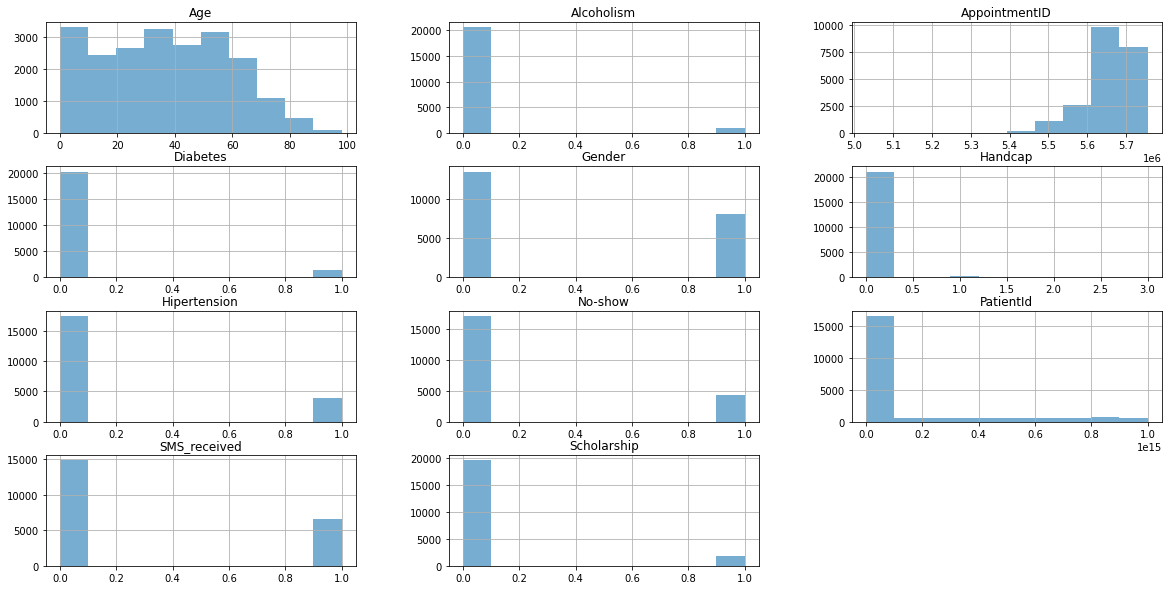

In [ ]:
df_plots.hist(alpha=0.6, column=df_plots.columns, figsize=(20,10));

**Apresentação da correlação entre os atributos para base de dados.**

In [ ]:
# Verificação de correlação entre os atributos.

df_corr = df.copy()
df_corr = df_corr.corr(method='spearman')

df_corr

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,0.004523,0.010004,-0.001670,-0.000545,0.002369,0.006359,0.007889,-0.007894,-0.008262,-0.000711
AppointmentID,0.004523,1.000000,0.016891,0.005726,0.012692,0.018927,0.025776,0.030053,0.017544,-0.244925,-0.171739
Gender,0.010004,0.016891,1.000000,-0.107099,-0.114293,-0.055718,-0.032554,0.106167,0.022437,-0.046298,-0.004119
Age,-0.001670,0.005726,-0.107099,1.000000,-0.090099,0.503204,0.293320,0.102266,0.078889,0.015389,-0.061228
Scholarship,-0.000545,0.012692,-0.114293,-0.090099,1.000000,-0.019729,-0.024894,0.035022,-0.009094,0.001194,0.029135
Hipertension,0.002369,0.018927,-0.055718,0.503204,-0.019729,1.000000,0.433086,0.087971,0.084845,-0.006267,-0.035701
Diabetes,0.006359,0.025776,-0.032554,0.293320,-0.024894,0.433086,1.000000,0.018474,0.059180,-0.014550,-0.015180
Alcoholism,0.007889,0.030053,0.106167,0.102266,0.035022,0.087971,0.018474,1.000000,0.003702,-0.026147,-0.000196
Handcap,-0.007894,0.017544,0.022437,0.078889,-0.009094,0.084845,0.059180,0.003702,1.000000,-0.025221,-0.007265
SMS_received,-0.008262,-0.244925,-0.046298,0.015389,0.001194,-0.006267,-0.014550,-0.026147,-0.025221,1.000000,0.126431




**Gráfico de correlação**

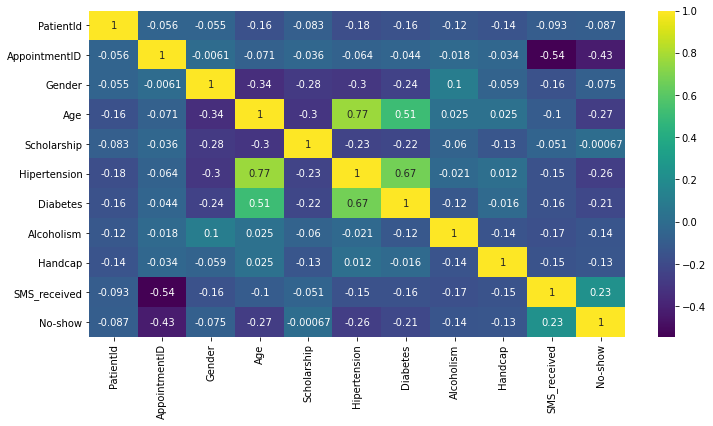

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis');

**Exclusão de atributos não interessantes para o nosso modelo**

In [ ]:
dados = df.copy()
del dados['PatientId']
del dados['AppointmentID']
del dados['ScheduledDay']
del dados['AppointmentDay']
del dados['Neighbourhood']
del dados['No-show']

**Definindo os rótulos**

In [ ]:
rotulos = df['No-show'].copy()
rotulos

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110527, dtype: int64

In [ ]:
rotulos.unique()

array([0, 1])

# **Criando a base de treino e teste.**

**Seleção dos atributos**

In [ ]:
X = dados.values
X

array([[ 0, 62,  0, ...,  0,  0,  0],
       [ 1, 56,  0, ...,  0,  0,  0],
       [ 0, 62,  0, ...,  0,  0,  0],
       ...,
       [ 0, 21,  0, ...,  0,  0,  1],
       [ 0, 38,  0, ...,  0,  0,  1],
       [ 0, 54,  0, ...,  0,  0,  1]])

In [ ]:
Y = rotulos.values
Y

array([0, 0, 0, ..., 0, 0, 0])

**Percentual de teste.**

In [ ]:
# 30% dos dados no teste do modelo.
split_test_size = 0.30

**Dados de treino.**

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, stratify=rotulos, random_state = 42)

In [ ]:
# Percentual de treino e teste respectivamente
print(format((len(X_treino)/len(df.index)) * 100))
print(format((len(X_teste)/len(df.index)) * 100))

69.99918571932649
30.0008142806735


# **Construção do modelo** 

**Criação do modelo com classificador GAUSSIAN NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo_NB = GaussianNB()

In [ ]:
modelo_NB.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn import metrics
#Acurácia para modelo treino

nb_pred_treino = modelo_NB.predict(X_treino)
print(format(metrics.accuracy_score(Y_treino, nb_pred_treino)))

0.789822665701582


In [ ]:
nb_pred_teste = modelo_NB.predict(X_teste)
#Acurácia para modelo de teste
nb_acuracia_teste = metrics.accuracy_score(Y_teste, nb_pred_teste)
print(format(nb_acuracia_teste))

0.7909164932597484


**Criando a matriz de confusão para o GAUSSIAN NAIVE BAYES**

In [ ]:
print(metrics.classification_report(Y_teste, nb_pred_teste, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     26463
           1       0.37      0.05      0.09      6696

    accuracy                           0.79     33159
   macro avg       0.59      0.51      0.49     33159
weighted avg       0.72      0.79      0.72     33159



**Criado modelo com classificador RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_rf = RandomForestClassifier(random_state = 42)
modelo_rf.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Acurácia treino
rf_pred_treino = modelo_rf.predict(X_treino)
print(format(metrics.accuracy_score(Y_treino, rf_pred_treino)))

0.8029288594767863


In [ ]:
# Acurácia teste
rf_pred_teste = modelo_rf.predict(X_teste)

rf_acuracia_teste = metrics.accuracy_score(Y_teste, rf_pred_teste)
print(format(rf_acuracia_teste))

0.7948973129467113


**Criando a Matriz de confusão para o classificador RANDOM FOREST**

In [ ]:
# Criando a matriz de confusão do RANDOM FOREST
print(metrics.classification_report(Y_teste, rf_pred_teste, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26463
           1       0.35      0.02      0.04      6696

    accuracy                           0.79     33159
   macro avg       0.58      0.51      0.46     33159
weighted avg       0.71      0.79      0.71     33159





---



**Criando modelo com classificador REGRESSÃO LOGÍSTICA**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_lr.fit(X_treino, Y_treino.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Acurácia Treino
lr_pred_treino = modelo_lr.predict(X_treino)
print(format(metrics.accuracy_score(Y_treino, lr_pred_treino)))

0.798068969082825


In [ ]:
# Acurácia Teste.
lr_pred_teste = modelo_lr.predict(X_teste)

lr_acuracia_teste = metrics.accuracy_score(Y_teste, lr_pred_teste)
print(format(lr_acuracia_teste))

0.7980638740613408


**Criando a Matriz de confusão para o classificador REGRESSÃO LOGÍSTICA**

In [ ]:
# Criando a matriz de confusão para REGRESSÃO LOGÍSTICA
print(metrics.classification_report(Y_teste, lr_pred_teste, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26463
           1       0.00      0.00      0.00      6696

    accuracy                           0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.64      0.80      0.71     33159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Avaliação do classificadores utilizados**

In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_nb = cross_validate(modelo_NB, dados, rotulos, cv=4, scoring=scoring_list)
scores_rf = cross_validate(modelo_rf, dados, rotulos, cv=4, scoring=scoring_list)
scores_lr = cross_validate(modelo_lr, dados, rotulos, cv=4, scoring=scoring_list)

avg_scores_nb = []
avg_scores_rf = []
avg_scores_lr = []

for score in scoring_list:
    avg_scores_nb.append(scores_nb['test_'+score].mean());
    avg_scores_rf.append(scores_rf['test_'+score].mean());
    avg_scores_lr.append(scores_lr['test_'+score].mean());


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

# **REPRESENTAÇÃO GRÁFICA DAS MÉTRICAS**

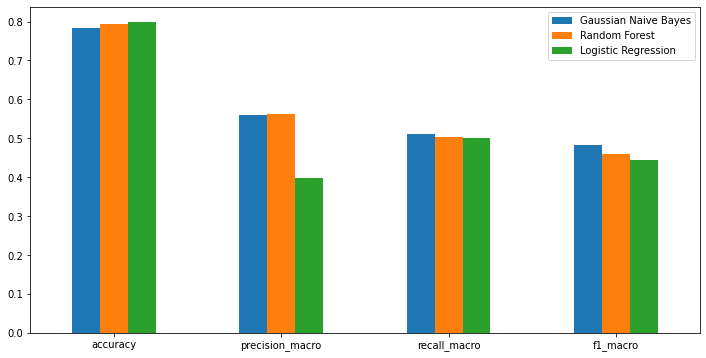

In [ ]:
df_plots = pd.DataFrame({'Gaussian Naive Bayes': avg_scores_nb,
                         'Random Forest': avg_scores_rf,
                         'Logistic Regression': avg_scores_lr}, index=scoring_list)

ax = df_plots.plot.bar(rot=0, figsize=(12,6))

# **CONCLUSÃO**

Após análise exploratória e testes, os modelos Randon foreste e Gaussian Naive Bayes tiveram métricas semelhantes, já a regressão logistica teve baixo desempenho. Com isso, tomando como referência a acurácia, o *Random Forest* teria vantagem
